# Image segmentation with scivision

In this notebook, we use scivision to load several image segmentation models from [Hugging Face](https://huggingface.co/models?pipeline_tag=image-segmentation&sort=downloads) and run them on compatible datasource from the scivision catalog.

The hugging face models are loaded via the hugging face segmentation plugin for scivision, which is a model entry in the scivision catalog. Click the [link to the plugin repo](https://github.com/alan-turing-institute/scivision_huggingface_segmentation) to find out which models it can be used to load. 

In [1]:
from scivision import default_catalog, load_pretrained_model, load_dataset

In [2]:
# Get the model repo url
models_catalog = default_catalog.models.to_dataframe()
model_repo = models_catalog[models_catalog.name == "huggingface-segmentation"].url.item()
model_repo # Why not paste the repo link into your browser and see how it looks?

AnyUrl('https://github.com/alan-turing-institute/scivision_huggingface_segmentation', scheme='https', host='github.com', tld='com', host_type='domain', path='/alan-turing-institute/scivision_huggingface_segmentation')

In [3]:
facebook_model = load_pretrained_model(model_repo, model='facebook_detr_resnet_50_panoptic')
nvidia_model = load_pretrained_model(model_repo, model='nvidia_segformer_b5_finetuned_ade_640_640')
microsoft_model = load_pretrained_model(model_repo, model='microsoft_beit_large_finetuned_ade_640_640')

/opt/anaconda3/envs/scivision/lib/python3.9/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /Users/distiller/project/pytorch/aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [4]:
compatible_datasources = default_catalog.compatible_datasources("huggingface-segmentation").to_dataframe()
compatible_datasources

,name,description,tasks,domains,url,format,labels_provided,institution,tags
0,data-000,None,"(TaskEnum.object_detection, TaskEnum.segmentat...","(optical-microscopy,)",https://github.com/stardist/stardist/releases/...,image,True,"(epfl,)","(help-needed, 3D, cell, cell-counting, biology..."
1,data-001,None,"(TaskEnum.segmentation, TaskEnum.thresholding,...","(multispectral, hyperspectral)",https://gitlab.au.dk/AUENG-Vision/OPPD/-/archi...,image,True,"(Aarhus University,)","(help-needed, 2D, plant-phenotyping, agricultu..."
5,data-005,Sample dataset of satellite imagery required t...,"(TaskEnum.classificiation, TaskEnum.segmentation)","(computer-vision, earth-observation, ecology)",https://github.com/MartinSJRogers/VEdge_Detect...,image,False,"(Cambridge University,)","(2D, satellite, remote-sensing, ecology, envir..."


In [5]:
target_datasource = compatible_datasources.loc[compatible_datasources['name'] == 'data-005']
target_datasource

,name,description,tasks,domains,url,format,labels_provided,institution,tags
5,data-005,Sample dataset of satellite imagery required t...,"(TaskEnum.classificiation, TaskEnum.segmentation)","(computer-vision, earth-observation, ecology)",https://github.com/MartinSJRogers/VEdge_Detect...,image,False,"(Cambridge University,)","(2D, satellite, remote-sensing, ecology, envir..."


In [6]:
target_datasource.url.item()

AnyUrl('https://github.com/MartinSJRogers/VEdge_Detector_scivision', scheme='https', host='github.com', tld='com', host_type='domain', path='/MartinSJRogers/VEdge_Detector_scivision')

In [7]:
cat = load_dataset(target_datasource.url.item()) 
print(list(cat))

['sample_image']


In [8]:
sample_image = cat.sample_image(sample_image='winterton').to_dask()

/opt/anaconda3/envs/scivision/lib/python3.9/site-packages/xarray/core/dataset.py:2172: FutureWarning: None value for 'chunks' is deprecated. It will raise an error in the future. Use instead '{}'
  warnings.warn(


In [9]:
import matplotlib.pyplot as plt

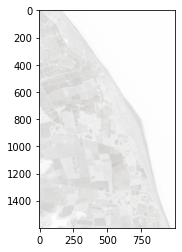

In [10]:
plt.imshow(sample_image)

In [11]:
fb_outputs = facebook_model.predict(sample_image)

In [12]:
nv_outputs = nvidia_model.predict(sample_image)

In [13]:
ms_outputs = microsoft_model.predict(sample_image)

In [16]:
fb_outputs

(DetrSegmentationOutput(loss=None, loss_dict=None, logits=tensor([[[-16.1586,  -3.3672,  -4.1644,  ..., -17.0871, -15.6756,  12.8223],
          [-16.5063,  -1.8943,  -6.6391,  ..., -16.9658, -15.8934,  13.2566],
          [-17.0935,  -1.6594,  -7.9489,  ..., -17.1152, -16.2002,  12.4349],
          ...,
          [-15.8920,  -2.7268,  -6.5317,  ..., -16.1740, -14.9697,  12.4627],
          [-16.5666,  -2.2675,  -7.3229,  ..., -16.3659, -15.4280,  12.2402],
          [-16.6542,  -2.9925,  -5.3223,  ..., -17.5232, -16.2470,  13.1812]]],
        grad_fn=<AddBackward0>), pred_boxes=tensor([[[0.5000, 0.3925, 0.9974, 0.7769],
          [0.4654, 0.5027, 0.2165, 0.5497],
          [0.7013, 0.9085, 0.1227, 0.1148],
          [0.5000, 0.4100, 0.9973, 0.8204],
          [0.8001, 0.7535, 0.0770, 0.0693],
          [0.0245, 0.1087, 0.0473, 0.0857],
          [0.5854, 0.8916, 0.2023, 0.1959],
          [0.2507, 0.7114, 0.1230, 0.1409],
          [0.0273, 0.8412, 0.0518, 0.1652],
          [0.1532, 

In [18]:
nv_outputs

(SemanticSegmenterOutput(loss=None, logits=tensor([[[[-10.5480, -12.6221, -12.7323,  ...,  -6.2110,  -5.9306,  -5.3099],
           [-12.7082, -13.7930, -13.7730,  ...,  -6.6113,  -6.2922,  -5.6243],
           [-12.4942, -13.5425, -12.6227,  ...,  -6.8111,  -6.5341,  -5.9109],
           ...,
           [ -8.0755,  -8.8012,  -9.0968,  ..., -10.0277,  -9.9224, -10.0206],
           [ -8.4627,  -8.9018,  -8.9743,  ..., -10.3473, -10.4664, -10.3558],
           [ -7.6262,  -9.2911,  -9.3678,  ..., -10.3707, -10.4827,  -9.9814]],
 
          [[ -9.1810, -10.9643, -11.3175,  ...,  -6.8570,  -6.5764,  -6.0727],
           [-11.1475, -11.9616, -12.0755,  ...,  -7.2152,  -6.9135,  -6.3537],
           [-11.0738, -11.9337, -11.2875,  ...,  -7.6201,  -7.2943,  -6.6199],
           ...,
           [ -5.9197,  -6.5525,  -6.9617,  ...,  -7.1044,  -7.2109,  -7.2808],
           [ -6.0980,  -6.4213,  -6.7127,  ...,  -7.3047,  -7.5594,  -7.4512],
           [ -5.1734,  -6.7127,  -7.1109,  ...,  -7.21

In [19]:
ms_outputs

(SemanticSegmenterOutput(loss=None, logits=tensor([[[[ -3.6521,  -1.3131,  -2.1426,  ...,  -2.0119,  -1.1952,  -3.4079],
           [ -1.9077,  -0.5096,  -1.1798,  ...,  -1.1478,  -0.3056,  -1.7560],
           [ -2.6581,  -1.2200,  -2.2376,  ...,  -2.0488,  -0.8618,  -2.4059],
           ...,
           [ -1.7008,  -0.0982,  -0.7208,  ...,  -1.0134,  -0.0625,  -1.3286],
           [ -1.3140,   0.3414,  -0.2406,  ...,  -0.5123,   0.2421,  -1.0596],
           [ -3.6965,  -1.5698,  -1.9384,  ...,  -2.3739,  -1.5314,  -3.5456]],
 
          [[ -4.8837,  -2.2391,  -2.5257,  ...,  -2.6901,  -1.9624,  -4.3119],
           [ -2.4982,  -0.6213,  -1.0303,  ...,  -0.9772,  -0.5147,  -2.3991],
           [ -3.1403,  -1.4019,  -1.7880,  ...,  -1.9181,  -1.0317,  -2.9218],
           ...,
           [ -2.5165,  -0.9667,  -1.3961,  ...,  -1.4021,  -1.0628,  -2.7311],
           [ -2.1753,  -0.6804,  -0.9297,  ...,  -1.0812,  -0.6380,  -2.3422],
           [ -4.6470,  -2.4069,  -2.7500,  ...,  -2.85